Retrieve csv data from resources and check their attributes

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
# download the dataset
import urllib.request
from pylab import *

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


Preprocess the data (replace the miss value, conduct standardization)

In [6]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Preprocessing the data (Dealing with missing values, outliers, and categorical variables)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the training data into training set and validation set  (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_valid.shape)




(68600, 8)
(17151, 8)


1. Use all features to train the simplest Linear Model ,ranging from degree 1 to 5, and plot their performance by error curve

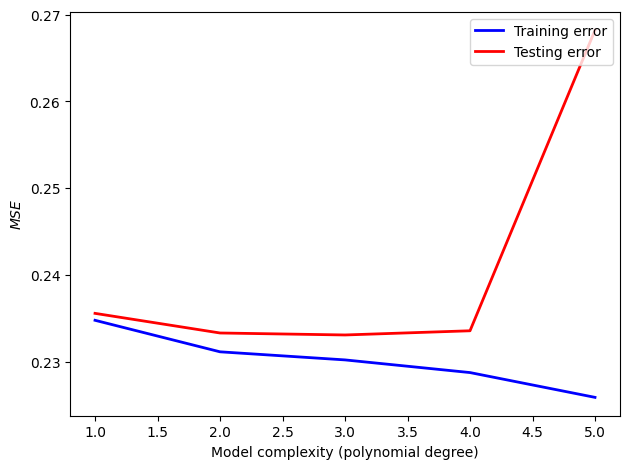

In [7]:
# Determine the best degree of polynomial features
train_error = []
valid_error = []

max_degree = 6

for i in range(1, max_degree):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lr_rg = LinearRegression()
    lr_rg.fit(X_train_poly, y_train)
    train_error.append(mean_squared_error(y_train, lr_rg.predict(X_train_poly)))
    valid_error.append(mean_squared_error(y_valid, lr_rg.predict(X_valid_poly)))
    
plt.plot(range(1, max_degree), train_error, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), valid_error, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

2. Select the model with degree 2, 3, 4, and plot learning curve to select the model with the best generalization potential

Degree = 2
Training error: 0.231076
Validation error: 0.237142
Generalization gap = 0.006066233943128024


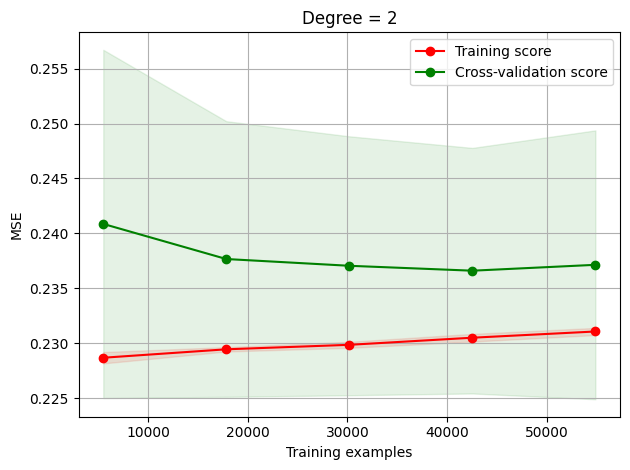

Degree = 3
Training error: 0.230042
Validation error: 1.169686
Generalization gap = 0.9396434882465173


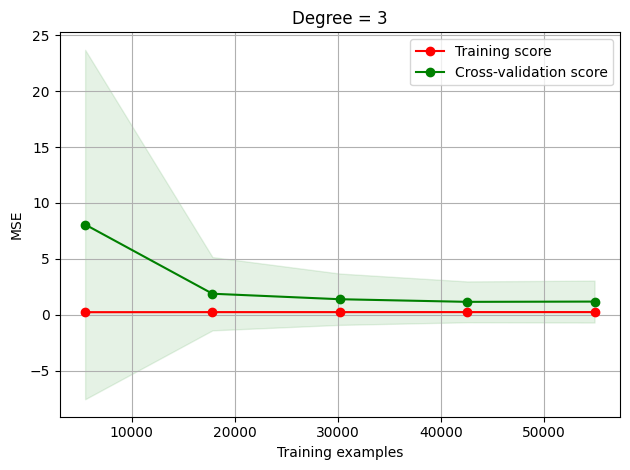

Degree = 4
Training error: 0.228367
Validation error: 20.435774
Generalization gap = 20.207407330465166


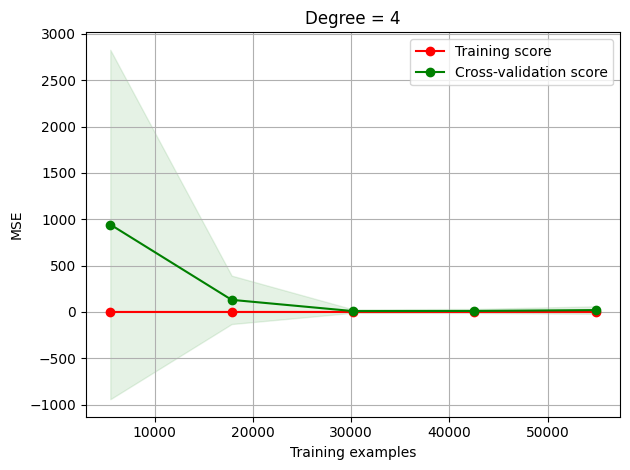

In [8]:
# Learning Curves and Sample Complexity
from sklearn.model_selection import learning_curve

def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()


degree = [2,3,4]
for d in degree:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lr_rg = LinearRegression()
    train_sizes, train_scores, valid_scores = learning_curve(lr_rg, X_train_poly, y_train, train_sizes=np.linspace(0.1, 1.0, 5), scoring=mse)
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
    
    print("Degree = %i" % d)
    print("Training error: %f" % train_scores_mean[-1])
    print("Validation error: %f" % valid_scores_mean[-1])
    print("Generalization gap =", abs(train_scores_mean[-1] - valid_scores_mean[-1]))
    # I want the y-axis to be centered at MSE=0.23
    # plt.ylim(0.1, 0.6)
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.title('Degree = %i' % d)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig('./output/fig-learning-curve-%i.png' % d, dpi=300)
    plt.show()
    
    

len of coefs 9
Coefficients:  [ 0.         -0.00046447 -0.00071511  0.02063736  0.00633412 -0.02683145
 -0.12634549  0.00705305  0.05850044]

[Alpha = 0.0010]
MSE train: 0.23, valid: 0.24
Coefficients:  [ 0.         -0.         -0.          0.02078519  0.         -0.02052928
 -0.12163904  0.0034919   0.0565353 ]

[Alpha = 0.0020]
MSE train: 0.23, valid: 0.24
Coefficients:  [ 0.         -0.         -0.          0.02056557  0.         -0.02011997
 -0.11701263  0.          0.05459587]

[Alpha = 0.0030]
MSE train: 0.23, valid: 0.24
Coefficients:  [ 0.         -0.         -0.          0.02007692 -0.         -0.01933901
 -0.11495988  0.          0.05262458]

[Alpha = 0.0040]
MSE train: 0.23, valid: 0.24
Coefficients:  [ 0.         -0.         -0.          0.01958827 -0.         -0.01855805
 -0.11290714  0.          0.0506533 ]

[Alpha = 0.0050]
MSE train: 0.24, valid: 0.24
Coefficients:  [ 0.         -0.         -0.          0.01909964 -0.         -0.01777709
 -0.11085437  0.          0.0486

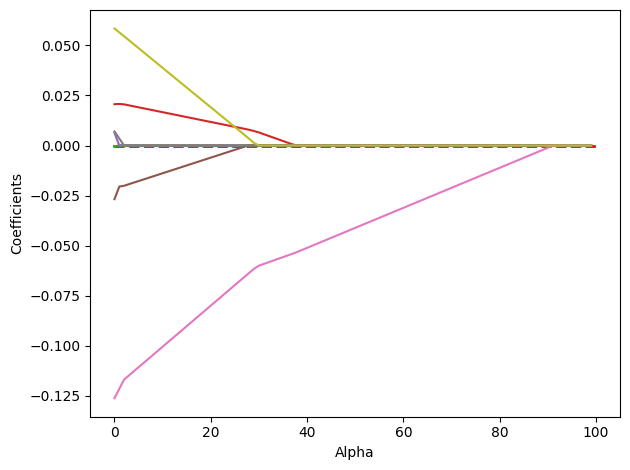

In [9]:
# With Degree = 1
poly = PolynomialFeatures(degree=1)
X_train_Poly_1 = poly.fit_transform(X_train)
X_valid_X_train_Poly_1 = poly.transform(X_valid)
X_test_X_train_Poly_1 = poly.transform(X_test)

len_of_coefs = X_train_Poly_1.shape[1]
print("len of coefs",len_of_coefs)


max_alpha = 100
coef_ = np.zeros((max_alpha,len_of_coefs))

i = 0
for a in [0.001*x for x in range(1, 100)]:
    lr_rg = Lasso(alpha=a,max_iter=5000)
    lr_rg.fit(X_train_Poly_1, y_train)

    y_train_pred = lr_rg.predict(X_train_Poly_1)
    y_valid_pred = lr_rg.predict(X_valid_X_train_Poly_1)
    y_test_pred = lr_rg.predict(X_test_X_train_Poly_1)
    coef_[i,:] = lr_rg.coef_.reshape(1,-1)
    print("Coefficients: ", coef_[i,:])
    i += 1
    print('\n[Alpha = %.4f]' % a )
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))  

plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(len_of_coefs):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-lasso-decay-deg1.png', dpi=300)
plt.show()

3. Use Lasso-Regression Model to eliminate un-relevant features. (Consequence: keep TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST)

len of coefs 45
Coefficients:  [ 0.00000000e+00 -1.09711900e-03 -0.00000000e+00  1.64891391e-02
 -7.23848395e-03 -3.04486723e-02 -1.36806951e-01  0.00000000e+00
  9.32612892e-02 -1.79051545e-03  0.00000000e+00  0.00000000e+00
 -1.31558362e-03 -0.00000000e+00 -6.48864021e-03 -1.04603008e-03
 -0.00000000e+00  9.00615703e-05  2.12553190e-04  2.77147219e-04
  2.09844757e-03  1.73194319e-03  0.00000000e+00 -2.17371663e-03
 -9.30452944e-03  7.60079336e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27800841e-03  2.07290311e-03  7.60499741e-03
  0.00000000e+00 -2.24448384e-03 -0.00000000e+00 -5.10320967e-04
  1.74449381e-02 -1.13975547e-03 -3.52717792e-03  6.76625726e-02
 -1.54724852e-02 -4.39756083e-02  0.00000000e+00  3.60956255e-03
 -7.73180412e-03]

[Alpha = 0.0010]
MSE train: 0.23, valid: 0.23
Coefficients:  [ 0.         -0.00035528 -0.          0.01577729 -0.00022752 -0.03159359
 -0.13498482 -0.          0.09016898 -0.00089441  0.          0.
 -0.00014594 -0.         -0.00583488

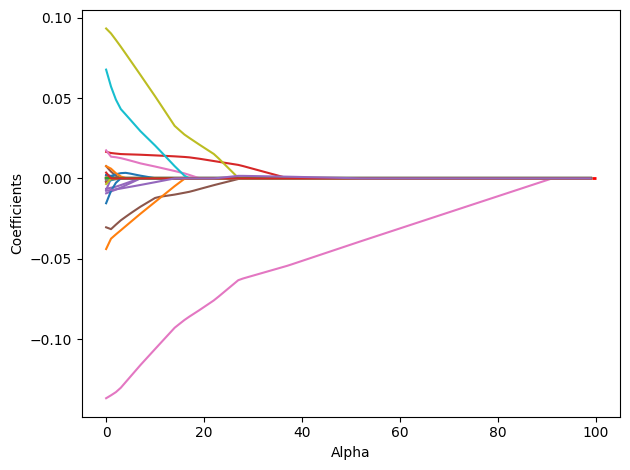

In [10]:
# With Degree = 2
poly = PolynomialFeatures(degree=2)
X_train_Poly_2 = poly.fit_transform(X_train)
X_valid_Poly_2 = poly.transform(X_valid)
X_test_Poly_2 = poly.transform(X_test)

# print("X_train[0]",X_train[0])
# print("X_train_Poly_2[0]",X_train_Poly_2[0])

len_of_coefs = X_train_Poly_2.shape[1]
print("len of coefs",len_of_coefs)


max_alpha = 100
coef_ = np.zeros((max_alpha,len_of_coefs))

i = 0
for a in [0.001*x for x in range(1, 100)]:
    lr_rg = Lasso(alpha=a,max_iter=5000)
    lr_rg.fit(X_train_Poly_2, y_train)

    y_train_pred = lr_rg.predict(X_train_Poly_2)
    y_valid_pred = lr_rg.predict(X_valid_Poly_2)
    y_test_pred = lr_rg.predict(X_test_Poly_2)
    coef_[i,:] = lr_rg.coef_.reshape(1,-1)
    print("Coefficients: ", coef_[i,:])
    i += 1
    print('\n[Alpha = %.4f]' % a )
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))  

plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(len_of_coefs):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-lasso-decay-deg2.png', dpi=300)
plt.show()

4. Use TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST as the only features and re-train the model (simple LR with degree=2)
5. Export the prediction for X_test.csv

In [11]:
# Observe the coefficients of Lasso regression with alpha = 0.0390, degree = 2
# MSE train: 0.24, valid: 0.24
# Coefficients:  [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -5.24059309e-02 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.25640167e-06
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   9.20494328e-04]

# Only leave the feature of TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST

# Retrain the model with the selected features
# With Degree = 2
poly = PolynomialFeatures(degree=2)
X_selected_train = X_train[:,[4,5,7]]
X_selected_valid = X_valid[:,[4,5,7]]
X_selected_test = X_test[:,[4,5,7]]

X_selected_train_Poly_2 = poly.fit_transform(X_selected_train)
X_selected_valid_Poly_2 = poly.transform(X_selected_valid)
X_selected_test_Poly_2 = poly.transform(X_selected_test)

len_of_coefs = X_selected_train_Poly_2.shape[1]
# print("len of coefs",len_of_coefs)

lr_rg = LinearRegression()
lr_rg.fit(X_selected_train_Poly_2, y_train)
print('MSE train: %f, valid: %f' % (
                    mean_squared_error(y_train, lr_rg.predict(X_selected_train_Poly_2)),
                    mean_squared_error(y_valid, lr_rg.predict(X_selected_valid_Poly_2))))
print('Generalization gap =', abs(mean_squared_error(y_train, lr_rg.predict(X_selected_train_Poly_2)) - mean_squared_error(y_valid, lr_rg.predict(X_selected_valid_Poly_2))))
print('Coefficients: ', lr_rg.coef_)

# Export the predictions of the model trained in for X_test (follow the format of y_train.csv).
y_test_pred = lr_rg.predict(X_selected_test_Poly_2)
y_test_pred = pd.DataFrame(y_test_pred, columns=['FGM'])
y_test_pred.to_csv('./output/y_test_2.csv', index=False)



MSE train: 0.232183, valid: 0.233616
Generalization gap = 0.0014334864401404634
Coefficients:  [[ 0.         -0.02164179 -0.14660988  0.10289311  0.00069482  0.02037415
  -0.00883481  0.05985404 -0.04301581 -0.0091237 ]]


6. Summary: 
In this lab, we first train a LR-model with all features and suspect that the model woth deg=2,3,4 might be candidates.
Then we go on and plot the learing curve the find the one with minimal generalization gap, with is the one with deg=2.
In addition, we apply Lasso-Regression with alpha=0.0390, to extract the three crucialest features: Use TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST.
Finally, we retrain the model selected initially with merely these three attributes, and make prediction to X_test.